In [20]:
#Código asociado a la simulación de montecarlo para estudiar el comportamiento del modelo de ising en 2D usando Metropolis
#Se importan los pkg necesarios

import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [21]:
#se definen las variables del modelo
N=15 #Numero de spines
J=2 # Valor del acople entre spines
t=100000 #Numero de iteraciones
kb=1 #constante de Boltzmann
Tc=4.54 #Temperatura critica teniendo en cuenta el valor de J
T1=1.2 #primer valor de temperatura
T2=3.6 #segundo valor de temperatura

In [30]:
#se usaran distintas funciones para realizar las tareas de calculo
def gen_red(N): #funcion que genera la red
    lattice= 2*np.random.randint(2, size=(int(N), int(N)))-1 #se usa la funcion randomint de numpy para generar un entero aleatorio entre 0 y 1, el 2*numero -1 garantiza que se genere un numero entre -1 y 1
    return lattice #la función crea la red y la regresa para poder trabajar con ella

def posi_random(N): #genera una posición aleatoria en la red
    return np.random.randint(N, size=2)

def cal_energia(lattice): #función que calcula la energía dada la red usando el Hamiltoniano de Ising sin interaccion con campo h.
    original,derecha,arriba=lattice,np.roll(lattice,+1,axis=0),np.roll(lattice,+1,axis=1) #usamos la funcion roll para ver los vecinos inmediatos de la red
    suma=np.sum((derecha+arriba)*original)#realizamos la suma sobre todos los elementos que sean primeros vecinos de una posicion de la red original
    H= -J*suma
    return H

def magnetizacion(lattice): #calcula la magnetizacion por spin para una configuracion dada
    m=np.mean(lattice)
    return m 

def intercambio(lattice, r): #cambia los spines de estado (+1 a -1 y -1 a 1)
    red_intercambiada=np.copy(lattice)
    red_intercambiada[r[0], r[1]]=-lattice[r[0], r[1]]
    return red_intercambiada

def mh_algoritmo(lattice, temperatura): #algoritmo que ejecuta los pasos correspondientes a metropolis segun se describe en el enunciado de la tarea
    ener=[]#lista que guarda la energia en cada iteracion 
    magneti=[]#lista que guarda la magnetizacion en cada iteracion
    ener.append(cal_energia(lattice)) #valor inicial de energia
    magneti.append(magnetizacion(lattice))#valor inicial de magnetizacion
    
    for i in range(1, t): #se realizan todas las iteraciones 
            x=posi_random(N) #se genera una posicion al azar dentro de la red
            red_2=intercambio(lattice, x)#voltea el spin
            energia_2=cal_energia(red_2)#calcula la energia de la nueva red
            delta=energia_2-ener[i-1] #calcula el delta de energia
            if(delta<=0): #si este delta es menor a cero acepta el valor y lo guarda
                lattice=red_2 #guarda la red
                ener.append(energia_2)#guarda la energia
                magneti.append(magnetizacion(red_2))#guarda la magnetizacion
            else: #si delta no es menor que cero realiza los demas pasos
                numero=rdm.uniform(0,1)# se genera un numero aleatorio entre 0 y 1 con probabilidad uniforme
                w=np.exp(-delta/(kb*temperatura)) #calcula el factor de aceptancia
                if(numero<w): #establece la condicion de si el numero es menor al factor de aceptancia, se guarda la energia y la magnetizacion 
                    lattice=red_2 #guarda la red
                    ener.append(energia_2)#guarda la energia
                    magneti.append(magnetizacion(red_2))#guarda la magnetizacion
                else: #de lo contrario no se acepta
                    ener.append(cal_energia(lattice))
                    magneti.append(magnetizacion(lattice))
        
    energia=np.array(ener)
    magne=np.array(magneti)
    prom_energia=np.mean(ener[int(0.75*t):])#se calcula el promedio con base en los datos cuando la simulacion se ha estabilizado
    prom_magnetizacion=np.mean(magneti[int(0.75*t):])
    return energia, magne, prom_energia, prom_magnetizacion

In [41]:
#tomamos una temperatura, en este caso T_1=1.2 y corremos el algoritmo
lattice=gen_red(N)
e, ma, prom_e, prom_ma = mh_algoritmo(lattice, T1)
print("La energía promedio es"+str(e))
print("La magnetizacion promedio es"+str(ma))

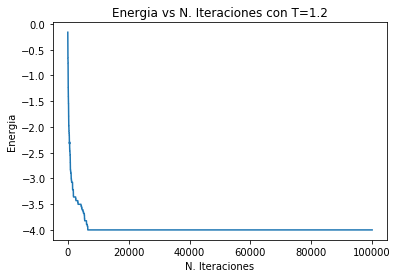

In [42]:
#se realizan las graficas
ejex=np.linspace(0,t,t)
ejey=e/N**2 #energia normalizada al numero de spines
plt.plot(ejex, ejey)
plt.xlabel('N. Iteraciones')
plt.ylabel('Energia')
plt.title('Energia vs N. Iteraciones con T=1.2')
plt.show()

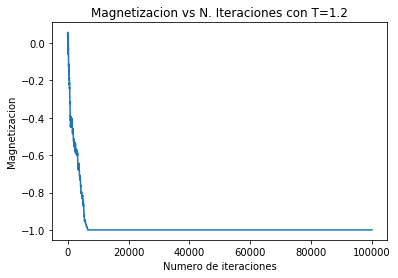

In [43]:
ejey_2=ma #magnetizacion normalizada al numero de spines
plt.plot(ejex, ejey_2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Magnetizacion')
plt.title('Magnetizacion vs N. Iteraciones con T=1.2')
plt.show()

In [44]:
#tomamos una temperatura, en este caso T_1=3.6 y corremos el algoritmo
lattice=gen_red(N)
e, ma, prom_e, prom_ma = mh_algoritmo(lattice, T2)
print("La energía promedio es"+str(e))
print("La magnetizacion promedio es"+str(ma))

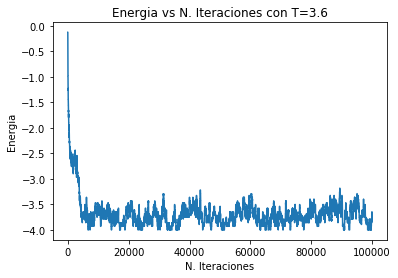

In [45]:
#se realizan las graficas
ejex=np.linspace(0,t,t)
ejey=e/N**2 #energia normalizada al numero de spines
plt.plot(ejex, ejey)
plt.xlabel('N. Iteraciones')
plt.ylabel('Energia')
plt.title('Energia vs N. Iteraciones con T=3.6')
plt.show()

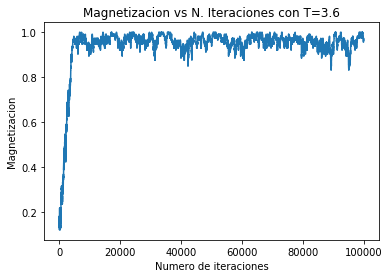

In [46]:
ejey_2=ma #magnetizacion normalizada al numero de spines
plt.plot(ejex, ejey_2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Magnetizacion')
plt.title('Magnetizacion vs N. Iteraciones con T=3.6')
plt.show()

In [48]:
#Ahora debemos tomar rangos de temperatura por encima y por debajo de la T_c
temps=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, Tc, 5, 5.5, 6, 6.5, 7, 7.5, 8]
temps=np.array(temps)
prom_energias=np.zeros(len(temps))#se crea un arreglo de ceros donde se van a guardar los distintos valores de energia
prom_mag=np.zeros(len(temps))#se crea un arreglo de ceros donde se van a guardar los distintos valores de magnetizacion
lattice_2=gen_red(N)#genera una nueva red
for i,T in enumerate(temps): #iniciamos el algoritmo de metropolis para cada valor de temperatura
    ens, mags, proms_en, proms_mag=mh_algoritmo(lattice_2, T)
    prom_energias[i]=proms_en
    prom_mag[i]=proms_mag

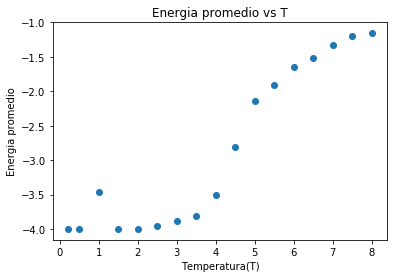

In [49]:
prom_energiasnorma=prom_energias/N**2#energias promedio normalizadas al numero total
plt.scatter(temps, prom_energiasnorma)
plt.xlabel('Temperatura(T)')
plt.ylabel('Energia promedio')
plt.title('Energia promedio vs T')
plt.show()

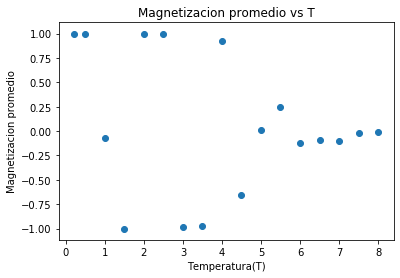

In [50]:
plt.scatter(temps,prom_mag)
plt.xlabel('Temperatura(T)')
plt.ylabel('Magnetizacion promedio')
plt.title('Magnetizacion promedio vs T')
plt.show()